In [1]:
## This command shows each cell take howmuch time to execute
#!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2021-03-22 14:27:20 +05:30)


## Download Images using bing-downloader

In [2]:
## For Image-Classification scrapping the images using python libraries

#!pip install bing-image-downloader

time: 250 ms (started: 2021-03-22 14:27:20 +05:30)


In [3]:
## to make directory use
## !mkdir images

time: 172 ms (started: 2021-03-22 14:27:20 +05:30)


In [4]:
## download images automatically from bing in our specific directory
'''
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=30,output_dir='images',
                   adult_filter_off=True)'''

'\nfrom bing_image_downloader import downloader\ndownloader.download("pretty sunflower",limit=30,output_dir=\'images\',\n                   adult_filter_off=True)'

time: 140 ms (started: 2021-03-22 14:27:20 +05:30)


In [5]:
'''downloader.download("rugby ball leather",limit=30,output_dir='images',
                   adult_filter_off=True)'''

'downloader.download("rugby ball leather",limit=30,output_dir=\'images\',\n                   adult_filter_off=True)'

time: 188 ms (started: 2021-03-22 14:27:21 +05:30)


In [6]:
'''downloader.download("ice cream cone",limit=30,output_dir='images',
                   adult_filter_off=True)'''

'downloader.download("ice cream cone",limit=30,output_dir=\'images\',\n                   adult_filter_off=True)'

time: 156 ms (started: 2021-03-22 14:27:21 +05:30)


## Data Preprocessing

 1. Resize
 2. Flatten

In [7]:
import os  ##used to many directories
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

time: 2.58 s (started: 2021-03-22 14:27:21 +05:30)


In [8]:
target = []
images = []
flat_data = []

DATADIR = '../Image_Classification/images'
CATEGORIES = ['pretty sunflower','rugby ball leather','ice cream cone']

for category in CATEGORIES:
    class_num = CATEGORIES.index(category) 
    path = os.path.join(DATADIR, category) 
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        img_resized = resize(img_array,(150,150,3)) #Normalizes the values to 0-1
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)
        
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 39.5 s (started: 2021-03-22 14:27:24 +05:30)


<BarContainer object of 3 artists>

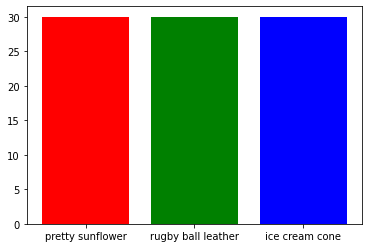

time: 172 ms (started: 2021-03-22 14:28:03 +05:30)


In [9]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count,color = ['red','green','blue'])

In [10]:
##split data into train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size = 0.3,
                                                 random_state = 100)

time: 2.52 s (started: 2021-03-22 14:28:03 +05:30)


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
    {'C':[1,10,100,1000],'kernel':['linear']},
    {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(X_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 1min 44s (started: 2021-03-22 14:28:06 +05:30)


In [12]:
y_pred = clf.predict(X_test)

time: 156 ms (started: 2021-03-22 14:29:51 +05:30)


In [13]:
y_pred

array([1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0,
       1, 0, 1, 0, 0])

time: 15 ms (started: 2021-03-22 14:29:51 +05:30)


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_pred,y_test)

0.9259259259259259

time: 62 ms (started: 2021-03-22 14:29:51 +05:30)


In [15]:
confusion_matrix(y_pred,y_test)

array([[10,  0,  0],
       [ 2,  8,  0],
       [ 0,  0,  7]], dtype=int64)

time: 78 ms (started: 2021-03-22 14:29:51 +05:30)


In [16]:
# Save the model using pickle

import pickle

pickle.dump(clf,open('image_model.p','wb'))

time: 94 ms (started: 2021-03-22 14:29:51 +05:30)


In [17]:
model = pickle.load(open('image_model.p','rb'))

time: 110 ms (started: 2021-03-22 14:29:51 +05:30)


Enter your URL: https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Strawberry_ice_cream_cone_%285076899310%29.jpg/220px-Strawberry_ice_cream_cone_%285076899310%29.jpg
(331, 220, 3)
PREDICTED OUTPUT: ice cream cone


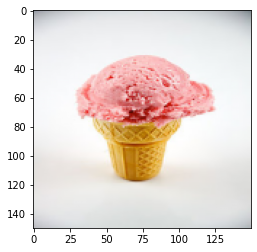

time: 3min 37s (started: 2021-03-22 14:29:51 +05:30)


In [18]:
# Testing a new image
flat_data = []
url = input('Enter your URL: ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

In [19]:
## for deployment the model
#!pip install streamlit

#!pip install pyngrok

time: 0 ns (started: 2021-03-22 14:33:28 +05:30)


In [20]:
## create streamlit application to build webapp

time: 141 ms (started: 2021-03-22 14:33:28 +05:30)


In [21]:
from pyngrok import ngrok

time: 469 ms (started: 2021-03-22 14:33:29 +05:30)


In [22]:
'''%%writefile app.py 

import os
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image

st.title("Image Classifier")
st.text("Upload the Image")'''

Overwriting app.py
time: 0 ns (started: 2021-03-22 14:33:29 +05:30)
